In [12]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [13]:
main_data=pd.read_csv("train.csv")
main_data


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [14]:
main_data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [15]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [16]:
main_data=main_data.drop(["store","sales"],axis=1)

In [17]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   item    913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


In [18]:
main_data["date"]=pd.to_datetime(main_data["date"])

In [19]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   item    913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


In [44]:
main_data["date"]=main_data["date"].dt.to_period("M")


AttributeError: 'PeriodProperties' object has no attribute 'to_period'

In [40]:
sales_monthly=main_data.groupby("date").sum().reset_index()


In [41]:
sales_monthly["date"]=sales_monthly["date"].dt.to_timestamp()

In [42]:
sales_monthly.head()

,date,item
0,2013-01-01,395250
1,2013-02-01,357000
2,2013-03-01,395250
3,2013-04-01,382500
4,2013-05-01,395250


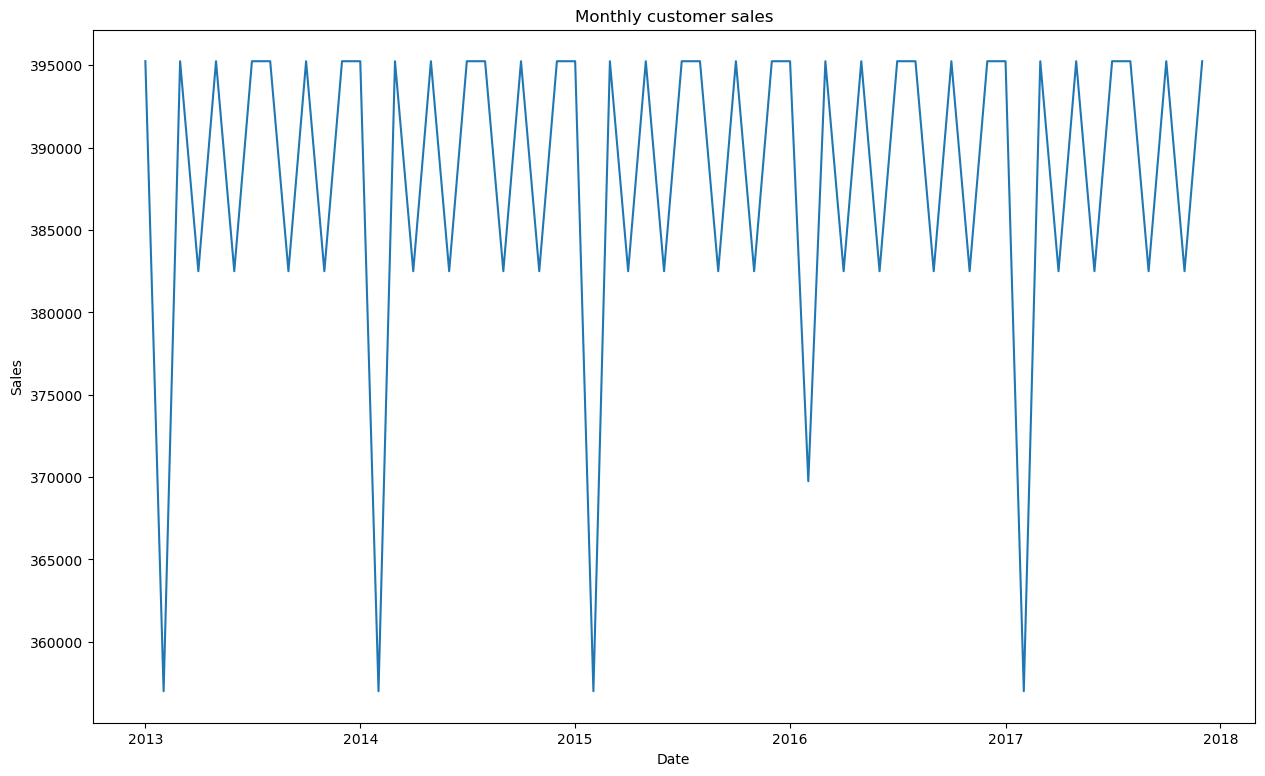

In [43]:
plt.figure(figsize=(15,9))
plt.plot(sales_monthly["date"],sales_monthly["item"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly customer sales")
plt.show()

In [46]:
sales_monthly["sales_diff"]=sales_monthly["item"].diff()
sales_monthly=sales_monthly.dropna()

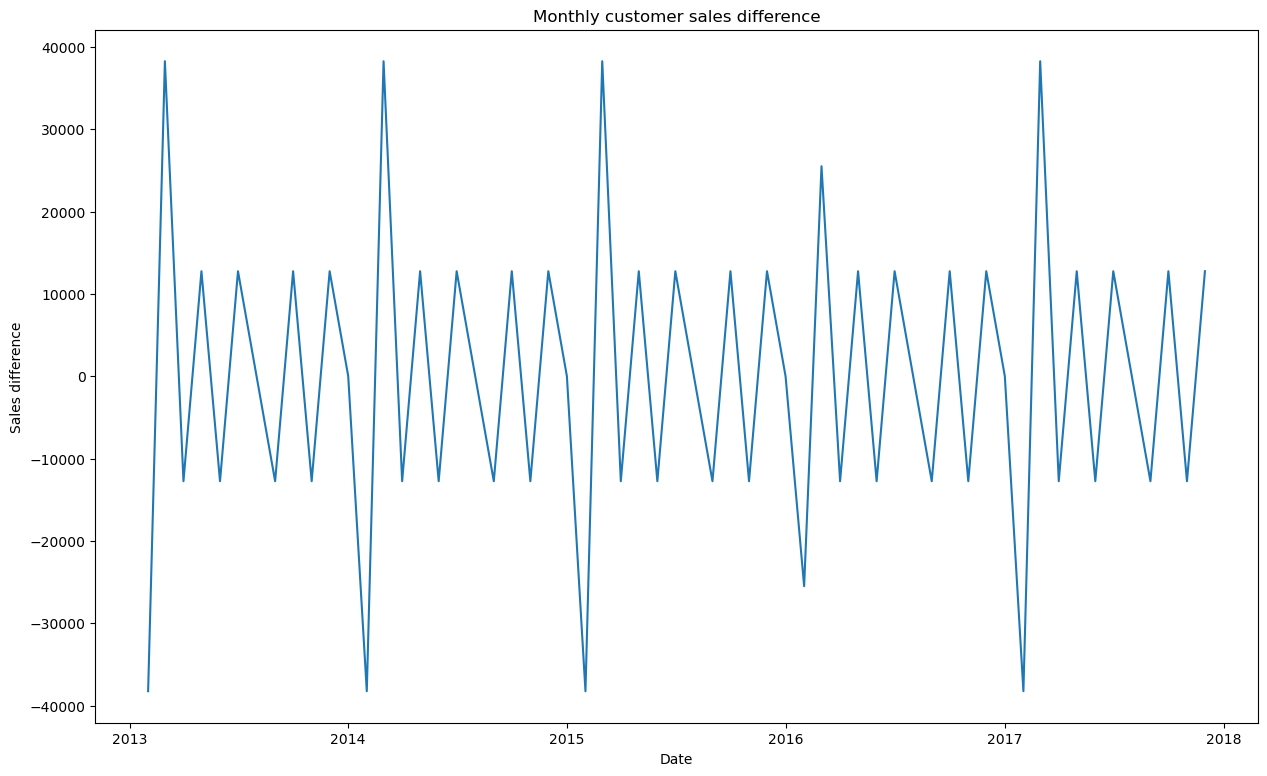

In [47]:
plt.figure(figsize=(15,9))
plt.plot(sales_monthly["date"],sales_monthly["sales_diff"])
plt.xlabel("Date")
plt.ylabel("Sales difference")
plt.title("Monthly customer sales difference")
plt.show()

In [49]:
super_data=sales_monthly.drop(["date","item"],axis=1)
super_data

,sales_diff
1,-38250.0
2,38250.0
3,-12750.0
4,12750.0
5,-12750.0
6,12750.0
7,0.0
8,-12750.0
9,12750.0
10,-12750.0


In [50]:
for i in range(1,13):
    col_name="month_" +str(i)
    super_data[col_name]=super_data["sales_diff"].shift(i)
super_data=super_data.dropna().reset_index(drop=True)
super_data.head(10)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-38250.0,0.0,12750.0,-12750.0,12750.0,-12750.0,0.0,12750.0,-12750.0,12750.0,-12750.0,38250.0,-38250.0
1,38250.0,-38250.0,0.0,12750.0,-12750.0,12750.0,-12750.0,0.0,12750.0,-12750.0,12750.0,-12750.0,38250.0
2,-12750.0,38250.0,-38250.0,0.0,12750.0,-12750.0,12750.0,-12750.0,0.0,12750.0,-12750.0,12750.0,-12750.0
3,12750.0,-12750.0,38250.0,-38250.0,0.0,12750.0,-12750.0,12750.0,-12750.0,0.0,12750.0,-12750.0,12750.0
4,-12750.0,12750.0,-12750.0,38250.0,-38250.0,0.0,12750.0,-12750.0,12750.0,-12750.0,0.0,12750.0,-12750.0
5,12750.0,-12750.0,12750.0,-12750.0,38250.0,-38250.0,0.0,12750.0,-12750.0,12750.0,-12750.0,0.0,12750.0
6,0.0,12750.0,-12750.0,12750.0,-12750.0,38250.0,-38250.0,0.0,12750.0,-12750.0,12750.0,-12750.0,0.0
7,-12750.0,0.0,12750.0,-12750.0,12750.0,-12750.0,38250.0,-38250.0,0.0,12750.0,-12750.0,12750.0,-12750.0
8,12750.0,-12750.0,0.0,12750.0,-12750.0,12750.0,-12750.0,38250.0,-38250.0,0.0,12750.0,-12750.0,12750.0
9,-12750.0,12750.0,-12750.0,0.0,12750.0,-12750.0,12750.0,-12750.0,38250.0,-38250.0,0.0,12750.0,-12750.0


In [54]:
train_data=super_data[:-12]
test_data=super_data[-12:]
test_data.shape

(12, 13)

In [55]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data=scaler.transform(train_data)
test_data=scaler.transform(test_data)

In [56]:
x_train,y_train=train_data[:,1:],train_data[:,0:1]
x_test,y_test=test_data[:,1:],test_data[:,0:1]
y_train=y_train.ravel()
y_test=y_test.ravel()

In [57]:
sales_dates=sales_monthly['date'][-12:].reset_index(drop=True)
predict_sales=pd.DataFrame(sales_dates)

In [60]:
act_sales=sales_monthly["item"][-13:].to_list()


In [61]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
lr_pred=lr_model.predict(x_test)

In [62]:
lr_pred=lr_pred.reshape(-1,1)
lr_pre_test_set=np.concatenate([lr_pred,x_test],axis=1)
lr_pre_test_set=scaler.inverse_transform(lr_pre_test_set)

In [65]:
result_lists=[]
for index in range(0,len(lr_pre_test_set)):
    result_lists.append(lr_pre_test_set[index][0] + act_sales[index])
lr_pre_series=pd.Series(result_lists,name="Linear Prediction")
predict_sales=predict_sales.merge(lr_pre_series,left_index=True,right_index=True)

In [66]:
#lr_mse=np.sqrt(mean_squared_error)
predict_sales

,date,Linear Prediction
0,2017-01-01,394863.756381
1,2017-02-01,372571.086210
2,2017-03-01,395322.285486
3,2017-04-01,382381.195633
4,2017-05-01,395216.417700
5,2017-06-01,382460.139190
6,2017-07-01,395234.087795
7,2017-08-01,395243.496241
8,2017-09-01,382322.576981
9,2017-10-01,395215.087074


In [70]:
lr_mse=np.sqrt(mean_squared_error(predict_sales["Linear Prediction"],sales_monthly["item"][-12:]))
lr_mae=mean_absolute_error(predict_sales["Linear Prediction"],sales_monthly["item"][-12:])
lr_r2=r2_score(predict_sales["Linear Prediction"],sales_monthly["item"][-12:])
lr_r2

0.6594989328638841

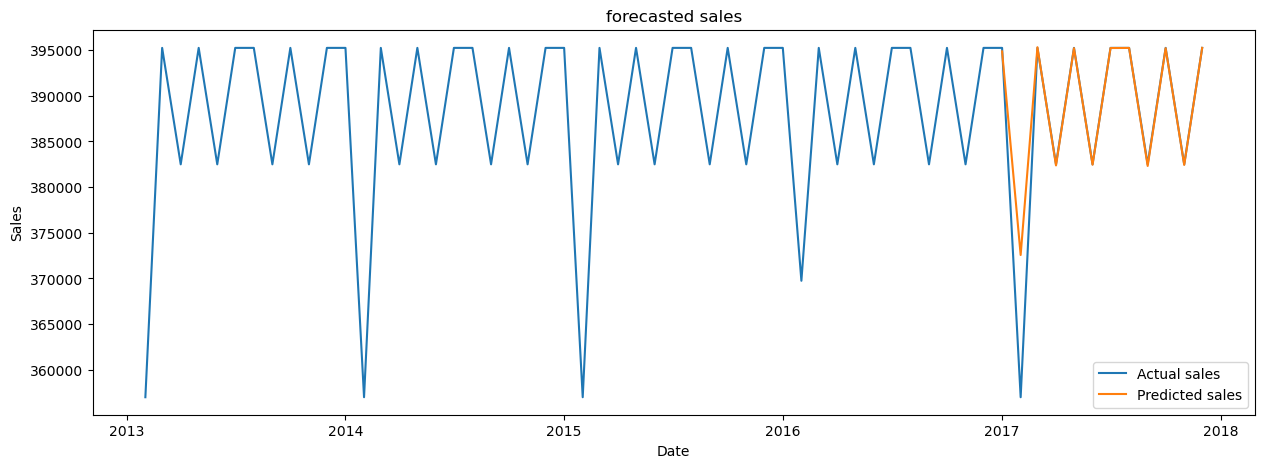

In [75]:
plt.figure(figsize=(15,5))
plt.plot(sales_monthly["date"],sales_monthly["item"])
plt.plot(predict_sales["date"],predict_sales["Linear Prediction"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("forecasted sales")
plt.legend(["Actual sales","Predicted sales"])
plt.show()